In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Train Data

In [3]:
train= pd.read_csv('train.csv', parse_dates=True)
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [5]:
train['Date']=pd.to_datetime(train['Date'])
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day
train['Week'] = pd.DatetimeIndex(train['Date']).week

C:\Users\laptop\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [6]:
train['WnvPresent'].value_counts()/len(train['WnvPresent'])

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

Text(0.5, 1.0, 'Distribution of West Nile Virus')

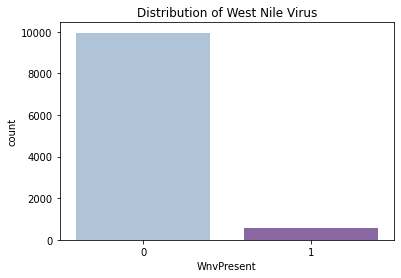

In [7]:
sns.countplot(x = 'WnvPresent',data = train,palette='BuPu').set_title('Distribution of West Nile Virus', color='black')

In [8]:
def duplicate(df):
    if len(df[df.duplicated()])>0:
        print('Number of Duplicates:', len(df[df.duplicated()]))
        df.drop_duplicates(inplace=True)
        print(df.info())
    else:
        print('No duplicates')

In [9]:
duplicate(train)

Number of Duplicates: 813
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 10505
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    9693 non-null   datetime64[ns]
 1   Address                 9693 non-null   object        
 2   Species                 9693 non-null   object        
 3   Block                   9693 non-null   int64         
 4   Street                  9693 non-null   object        
 5   Trap                    9693 non-null   object        
 6   AddressNumberAndStreet  9693 non-null   object        
 7   Latitude                9693 non-null   float64       
 8   Longitude               9693 non-null   float64       
 9   AddressAccuracy         9693 non-null   int64         
 10  NumMosquitos            9693 non-null   int64         
 11  WnvPresent              9693 non-null   int64         
 12  Year                 

In [10]:
new_colum_list=[ 'Date','Species', 'Latitude', 'Longitude','NumMosquitos','WnvPresent','Year','Month','Day']
train= train[new_colum_list]
train.head()

,Date,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,2007,5,29
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0,2007,5,29
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0,2007,5,29
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0,2007,5,29
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0,2007,5,29


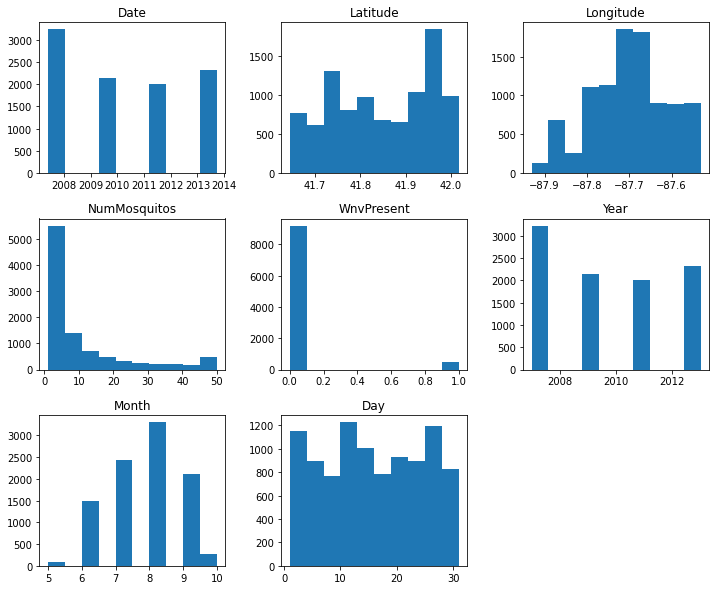

In [11]:
train.hist(figsize=(12,10), grid=False)
plt.show()

C:\Users\laptop\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\laptop\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Year', ylabel='count'>

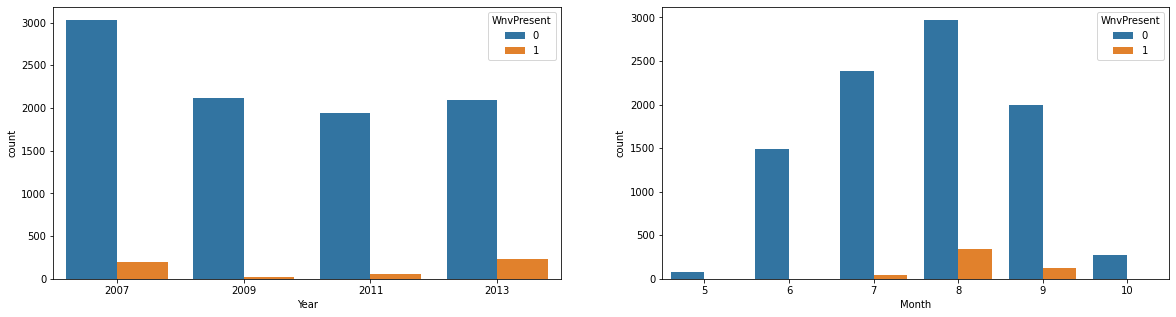

In [12]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,2) 
sns.countplot('Month',data=train,hue='WnvPresent')
plt.subplot(1,2,1) 
sns.countplot('Year',data=train,hue='WnvPresent')

C:\Users\laptop\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WnvPresent', ylabel='count'>

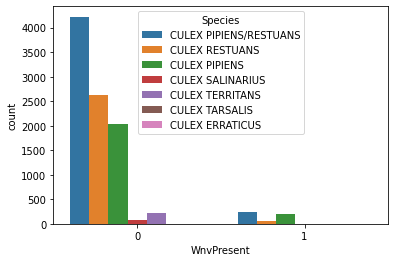

In [13]:
sns.countplot('WnvPresent',data=train,hue='Species')

Text(0.5, 1.0, 'Distrbution of Virus per Month and Year')

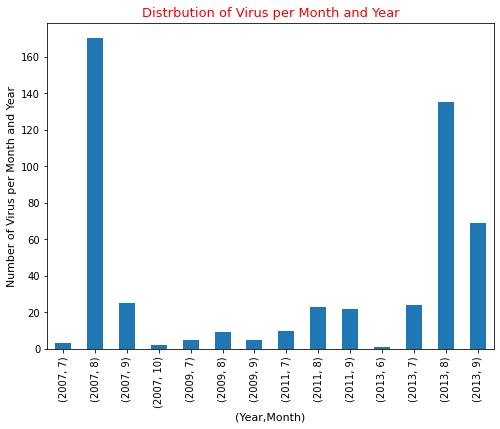

In [14]:
train[train['WnvPresent']==1].groupby(['Year','Month'])['NumMosquitos'].count().plot.bar(figsize=(8,6))  
plt.xlabel('(Year,Month)', size=11)  
plt.ylabel('Number of Virus per Month and Year', size=11)
plt.title('Distrbution of Virus per Month and Year', size=13, color='red')

**Visual Data Exploration By Using Map**

Virus is more commonly found in the northern part of the city.

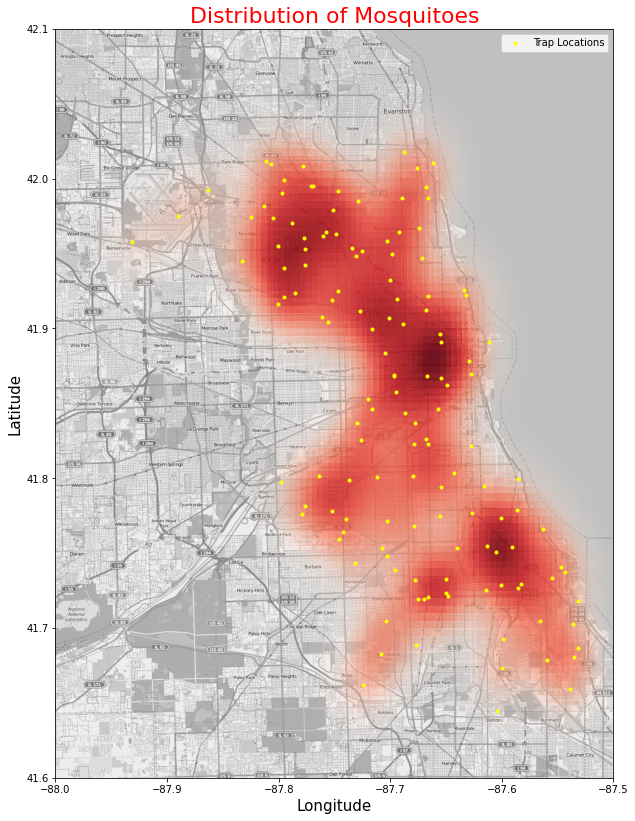

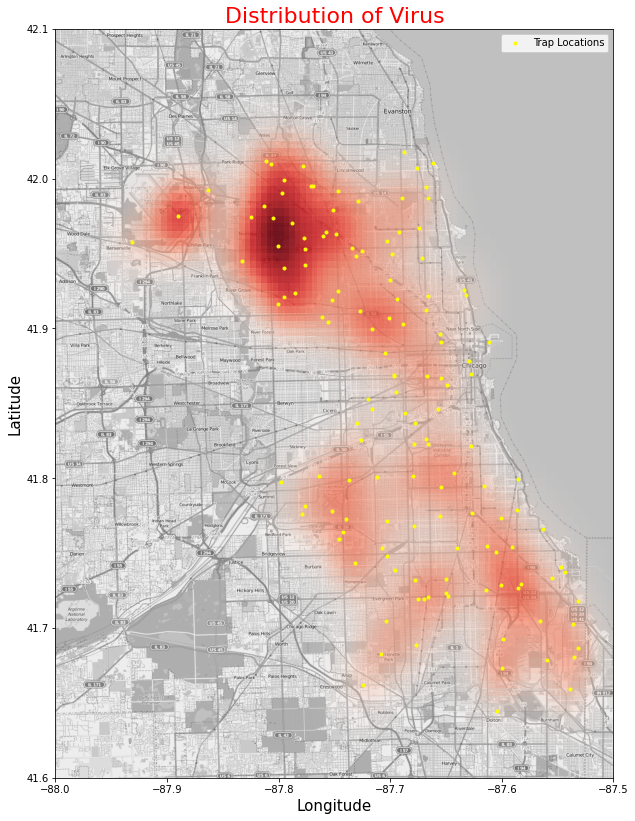

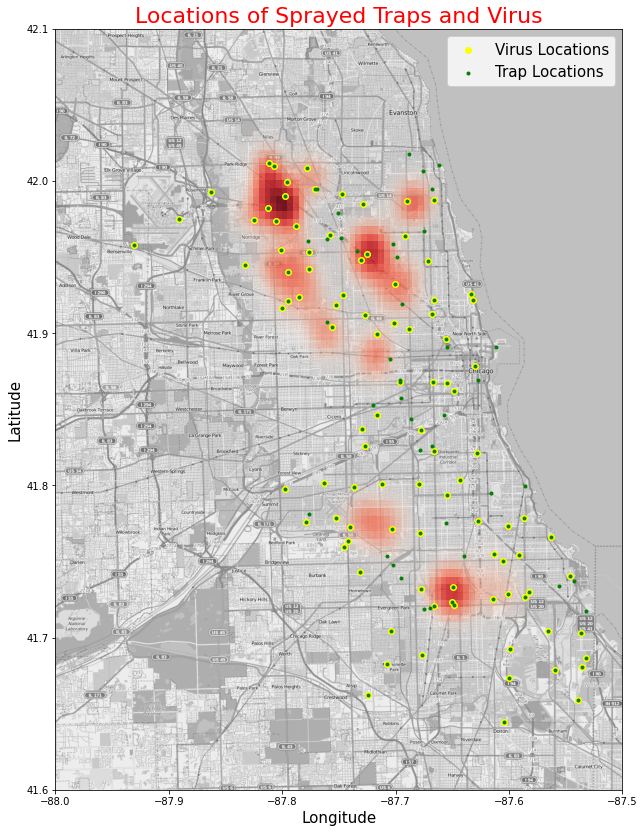

In [19]:
from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")
traps = train[['Date','Longitude', 'Latitude', 'WnvPresent','NumMosquitos']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

kd = KernelDensity(bandwidth=0.02)
kd.fit(X)
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# DISTRIBUTION OF MOSQUIOTES
sigthings2 = traps.groupby(['Date','Longitude', 'Latitude'])['NumMosquitos'].sum().reset_index()
X = sigthings2[['Longitude', 'Latitude']].values
kd2 = KernelDensity(bandwidth=0.02)
kd2.fit(X)
zv2 = np.exp(kd2.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv2, origin='lower', cmap=alpha_cm,extent=lon_lat_box, aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1],marker='.', color='yellow', label='Trap Locations')
plt.title('Distribution of Mosquitoes', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend()
plt.show()

# DISTRIBUTION OF VIRUS
sigthings3 = traps[traps['WnvPresent']==1]
sigthings3 = sigthings3.groupby(['Date','Longitude', 'Latitude'])['WnvPresent'].sum().reset_index()
X = sigthings3[['Longitude', 'Latitude']].values
kd3 = KernelDensity(bandwidth=0.02)
kd3.fit(X)
zv3 = np.exp(kd3.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv3, origin='lower', cmap=alpha_cm,extent=lon_lat_box,aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1],marker='.', color='yellow', label='Trap Locations')
plt.title('Distribution of Virus', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend()
plt.show()

# DISTRIBUTION OF SPRAY
spray_loc= spray[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.010)
kd.fit(spray_loc)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(18,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv,origin='lower',cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

virus_loc = train[train['WnvPresent']==1][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(virus_loc[:,0], virus_loc[:,1], marker='o', color='yellow', label='Virus Locations')
trap_loc = train[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_loc[:,0], trap_loc[:,1], marker='.', color='green', label='Trap Locations')
plt.legend(fontsize=15)
plt.title('Locations of Sprayed Traps and Virus', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

**The most common mosquito species are Culex Pipiens/Restuans,Culex Restuans and Culex Pipiens And only they have the virus.
Culex Restuans has the lowest Virus rate among them.**

In [69]:
print('Percentage of Species:','\n\n',round(train.Species.value_counts()/len(train.Species) *100,2), '\n\n')
print('Percentage of Virus per Species:','\n\n',round((train[train['WnvPresent']==1]['Species'].value_counts()/len(train[train['WnvPresent']==1]['Species']))*100),2)

Percentage of Species: 

 CULEX PIPIENS/RESTUANS    46.11
CULEX RESTUANS            27.57
CULEX PIPIENS             23.10
CULEX TERRITANS            2.28
CULEX SALINARIUS           0.88
CULEX TARSALIS             0.06
CULEX ERRATICUS            0.01
Name: Species, dtype: float64 


Percentage of Virus per Species: 

 CULEX PIPIENS/RESTUANS    49.0
CULEX PIPIENS             41.0
CULEX RESTUANS            10.0
Name: Species, dtype: float64 2


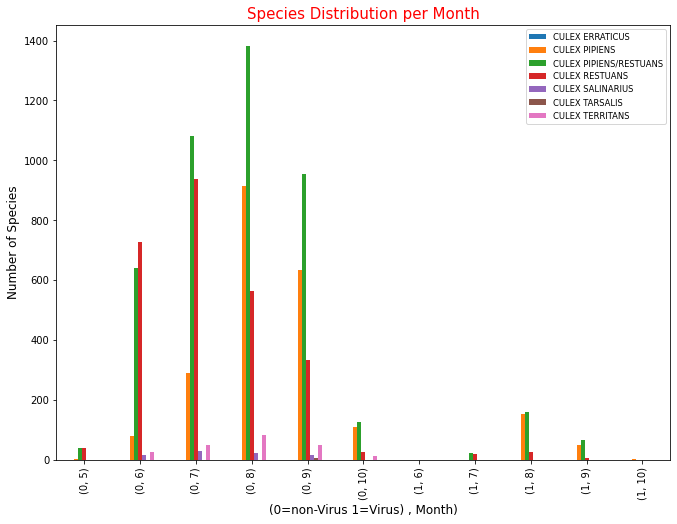

In [134]:
Virus_Species_Month=train.groupby(['WnvPresent', 'Month'])['Species'].value_counts().unstack().fillna(0)
Virus_Species_Month.plot.bar(figsize=(8,8))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='small')
plt.xlabel('(0=non-Virus 1=Virus) , Month)', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.title('Species Distribution per Month', fontsize=15, color='red')
plt.show()     

In [22]:
train= train.drop(['Year','Month'], axis=1)

In [23]:
train.to_csv('./cleaned_train.csv', index=False)

# Spray Data

In [18]:
spray= pd.read_csv('spray.csv')
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [25]:
spray.drop(['Time'], axis=1, inplace=True)
spray['Date']=pd.to_datetime(spray['Date'])
spray['Year'] = pd.DatetimeIndex(spray['Date']).year
spray['Month'] = pd.DatetimeIndex(spray['Date']).month
spray['Day'] = pd.DatetimeIndex(spray['Date']).day
spray['Week'] = pd.DatetimeIndex(spray['Date']).week
spray['YearWeek']= (spray['Year'].astype(str)+spray['Week'].astype(str)).astype('int64')
spray['YearMonth']=(spray['Year'].astype(str)+spray['Month'].astype(str)).astype('int64')
spray.drop(['Week'], axis=1, inplace=True)

C:\Users\laptop\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [26]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Latitude   14835 non-null  float64       
 2   Longitude  14835 non-null  float64       
 3   Year       14835 non-null  int64         
 4   Month      14835 non-null  int64         
 5   Day        14835 non-null  int64         
 6   YearWeek   14835 non-null  int64         
 7   YearMonth  14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 927.3 KB


In [28]:
duplicate(spray)

Number of Duplicates: 541
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14294 non-null  datetime64[ns]
 1   Latitude   14294 non-null  float64       
 2   Longitude  14294 non-null  float64       
 3   Year       14294 non-null  int64         
 4   Month      14294 non-null  int64         
 5   Day        14294 non-null  int64         
 6   YearWeek   14294 non-null  int64         
 7   YearMonth  14294 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 1005.0 KB
None


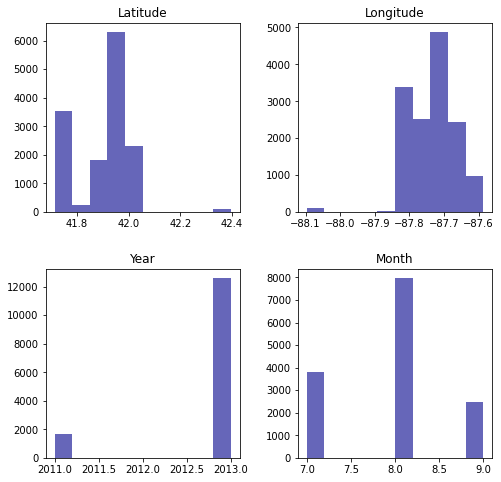

In [29]:
spray2=spray[['Latitude', 'Longitude', 'Year', 'Month']]
spray2.hist(figsize=(8,8),color='darkblue',alpha=0.6, grid=False)
plt.show()

In [33]:
spray= spray.drop(['Day','Month'], axis=1)

In [34]:
spray.to_csv('./cleaned_spray.csv', index=False)

# Weather Data

In [22]:
weather=pd.read_csv('weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [23]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

## Missing Data 

Although the above weather summary doesn't indicate any missing value, we know from NOAA Weather Documentation 'M' = MISSING DATA , 'T' = TRACE , '-' = values not available for sunrise/sunset.  To handle these missing data easily I replaced them with NaN. The below information indicates there are many missing data.

In [24]:
# COdeSUmdakini cikardik.. Sonra kullanacagiz.' '
missing_value= ['M','-', '  T']
weather.replace(missing_value, np.nan, inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      1472 non-null   object        
 11  Sunset       1472 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1460 non-null   object        
 16  Precip

In [25]:
missing_data= ['CodeSum','Water1','Depth','SnowFall','Sunrise','Sunset','Depart']
for i in missing_data:
    value=list()
    value.append(weather[i].value_counts(dropna=False))
    print('For',i,': \n', value,'\n')

For CodeSum : 
 [                     1609
RA                    296
RA BR                 238
BR                    110
TSRA RA BR             92
                     ... 
RA FG+ MIFG BR          1
BR HZ VCFG              1
RA DZ FG+ BCFG BR       1
TSRA BR HZ VCTS         1
HZ VCTS                 1
Name: CodeSum, Length: 98, dtype: int64] 

For Water1 : 
 [NaN    2944
Name: Water1, dtype: int64] 

For Depth : 
 [NaN    1472
0      1472
Name: Depth, dtype: int64] 

For SnowFall : 
 [NaN    1484
0.0    1459
0.1       1
Name: SnowFall, dtype: int64] 

For Sunrise : 
 [NaN     1472
0416     104
0417      64
0419      40
0420      32
        ... 
0516       8
0617       8
0545       8
0536       8
0550       8
Name: Sunrise, Length: 122, dtype: int64] 

For Sunset : 
 [NaN     1472
1931      96
1930      56
1929      48
1927      32
        ... 
1755       8
1706       8
1741       8
1835       8
1703       8
Name: Sunset, Length: 119, dtype: int64] 

For Depart : 
 [NaN    1472
 2      

### Dropping Features

In [26]:
drop_list= ['Water1','Depth','SnowFall','Sunrise','Sunset']
weather.drop(drop_list,axis=1, inplace=True)

In [27]:
codes = []
for code in weather.CodeSum.unique():
    for c in code.split():
        codes.append(c)
codes=list(set(codes))
codes
for c in codes:
    weather[c] =weather['CodeSum'].apply(lambda x:1 if c in x else 0)
    if weather[c].sum() < len(weather[c])/100:
        weather.drop(c, axis=1, inplace=True)
    else:
        continue

weather.drop('CodeSum', axis=1, inplace=True)

### Imputation of Missing Data

Depart : NAN values belong to Station2. Tmax, Tmin and Tavg values per day are almost same with Station1. 
Therefore we will replace the NAN with other station values by using forward fill.  

In [28]:
weather['Depart'].fillna(method = 'ffill', inplace=True)
weather['SeaLevel'].fillna(method = 'ffill', inplace=True)
weather['AvgSpeed'].fillna(method = 'ffill', inplace=True)
weather['StnPressure'].fillna(method = 'ffill', inplace=True)
weather['PrecipTotal'].fillna(method = 'ffill', inplace=True)

In [29]:
weather['Tavg'] = weather.apply( lambda x: round((x['Tmax'] + x['Tmin'])/2) if pd.isnull(x['Tavg']) else x['Tavg'],axis=1)
weather['Tavg']= pd.to_numeric(weather['Tavg'])

If the Average Temperature is above the Base Temperature 65°F, we subtract 65 from Tavg and the result is Cooling Degree Days. 
If the Average Temperature is above the Base Temperature 65°F, we subtract Tavg from 65 and the result is Heating Degree Days.

In [30]:
weather['Heat']=weather.apply( lambda x: (65- x['Tavg']) if x['Tavg']<65 else 0, axis=1)
weather['Cool']=weather.apply( lambda x: (x['Tavg']-65) if x['Tavg']>65 else 0, axis=1)

In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   int64         
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2944 non-null   int64         
 9   Cool         2944 non-null   int64         
 10  PrecipTotal  2944 non-null   object        
 11  StnPressure  2944 non-null   object        
 12  SeaLevel     2944 non-null   object        
 13  ResultSpeed  2944 non-null   float64       
 14  ResultDir    2944 non-null   int64         
 15  AvgSpeed     2944 non-null   object        
 16  DZ    

In [32]:
as_float = ['Depart','WetBulb','Heat','Cool','StnPressure','SeaLevel','AvgSpeed','PrecipTotal']
weather[as_float] = weather[as_float].astype('float')

In [33]:
weather.groupby('Station')['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb','Heat', 'Cool', 
                           'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed','ResultDir', 
                           'AvgSpeed'].agg('mean').T
# WE SEE THAT THERE IS NOT MUCH DIFFERENCE BETWEEN DATA. In order to aviod duplicate, WE WILL GET THE AVERAGES per each date 

C:\Users\laptop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Station,1,2
Tmax,75.978940,76.353261
Tmin,56.730978,58.889946
Tavg,66.606658,67.872283
Depart,1.954484,1.954484
DewPoint,53.377717,53.538043
WetBulb,59.036079,59.585316
Heat,3.631114,3.174592
Cool,5.237772,6.046875
PrecipTotal,0.153791,0.135883
StnPressure,29.254192,29.314701


In [34]:
weather=(weather.groupby('Date').agg('sum')/2).reset_index()
weather.drop(['Station'], axis=1, inplace=True)
weather[['FG','TS','DZ','TSRA','BR','HZ','RA']]= weather[['FG','TS','DZ','TSRA','BR','HZ','RA']].replace(0.5,1)
weather['Year'] = pd.DatetimeIndex(weather['Date']).year
weather['Month'] = pd.DatetimeIndex(weather['Date']).month
weather['Day'] = pd.DatetimeIndex(weather['Date']).day
weather['Week'] = pd.DatetimeIndex(weather['Date']).week
weather.head()

C:\Users\laptop\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  import sys


,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,...,TS,RA,HZ,TSRA,BR,FG,Year,Month,Day,Week
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,1,18
1,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,2007,5,2,18
2,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2007,5,3,18
3,2007-05-04,72.0,50.0,61.0,4.0,41.5,50.0,4.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2007,5,4,18
4,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2007,5,5,18


In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   float64       
 2   Tmin         1472 non-null   float64       
 3   Tavg         1472 non-null   float64       
 4   Depart       1472 non-null   float64       
 5   DewPoint     1472 non-null   float64       
 6   WetBulb      1472 non-null   float64       
 7   Heat         1472 non-null   float64       
 8   Cool         1472 non-null   float64       
 9   PrecipTotal  1472 non-null   float64       
 10  StnPressure  1472 non-null   float64       
 11  SeaLevel     1472 non-null   float64       
 12  ResultSpeed  1472 non-null   float64       
 13  ResultDir    1472 non-null   float64       
 14  AvgSpeed     1472 non-null   float64       
 15  DZ           1472 non-null   float64       
 16  TS    

In [36]:
int_list = ['Tmax','Tmin', 'Tavg']
weather[int_list] = weather[int_list].astype('int64')

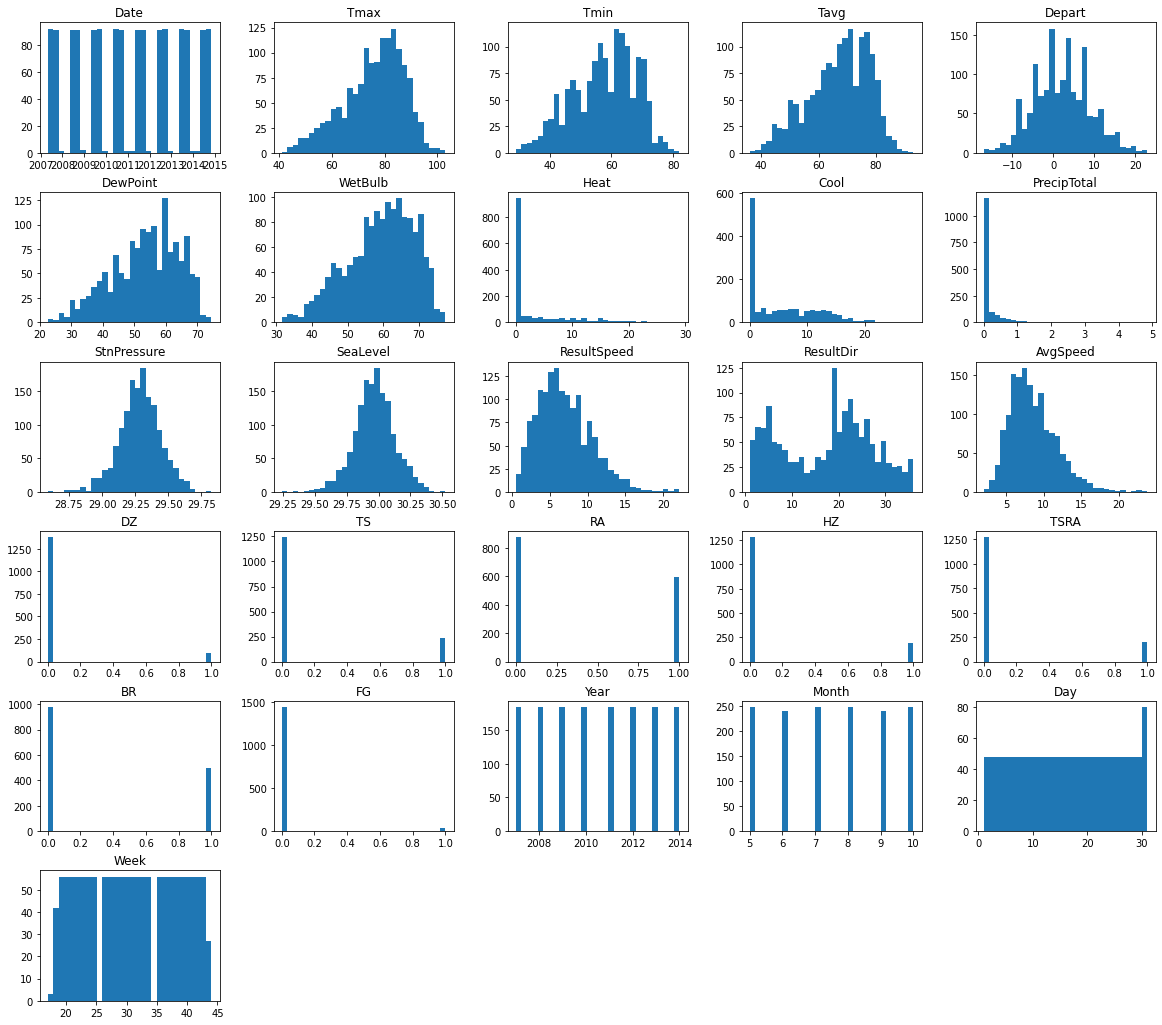

In [37]:
weather.hist(figsize=(20,18), grid= False, bins=30)
plt.show()

<AxesSubplot:>

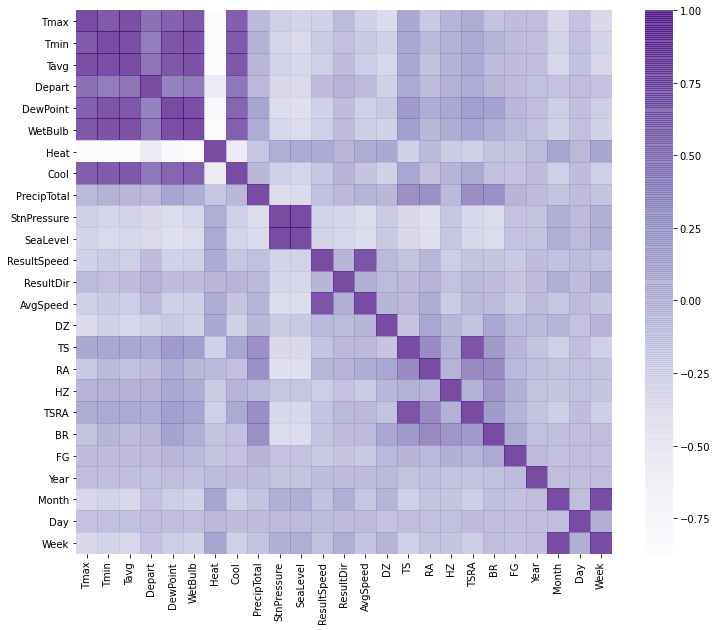

In [38]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(weather.corr(),cmap ='Purples', alpha=0.7)

In [39]:
weather['Date']=pd.to_datetime(weather['Date'])
weather['YearWeek']= (weather['Year'].astype(str)+weather['Week'].astype(str)).astype('int64')
weather['YearMonth']=(weather['Year'].astype(str)+weather['Month'].astype(str)).astype('int64')
weather.drop(['Week','Day'], axis=1, inplace=True)

In [58]:
weather.to_csv('cleaned_weather.csv', index=False)